In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pickle

In [2]:
df_fish = pd.read_csv('fish_data.csv')
df_fish

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [3]:
print("data shape : ", df_fish.shape)

data shape :  (4080, 4)


In [4]:
df_fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [5]:
df_fish[['length', 'weight', 'w_l_ratio']].describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [6]:
en = LabelEncoder()
df_fish['species'] = en.fit_transform(df_fish['species'])
df_fish.head()

,species,length,weight,w_l_ratio
0,0,10.66,3.45,0.32
1,0,6.91,3.27,0.47
2,0,8.38,3.46,0.41
3,0,7.57,3.36,0.44
4,0,10.83,3.38,0.31


In [7]:
df_fish.species.value_counts()

species
7    480
0    476
4    475
2    468
5    458
8    455
3    435
6    418
1    415
Name: count, dtype: int64

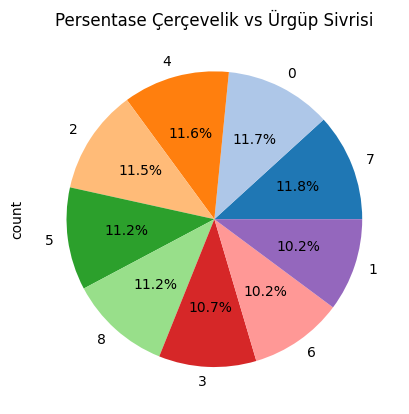

In [8]:
sns.set_palette('tab20')
df_fish['species'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Persentase Çerçevelik vs Ürgüp Sivrisi')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8436\2380253680.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_fish, x='species', palette='rocket')


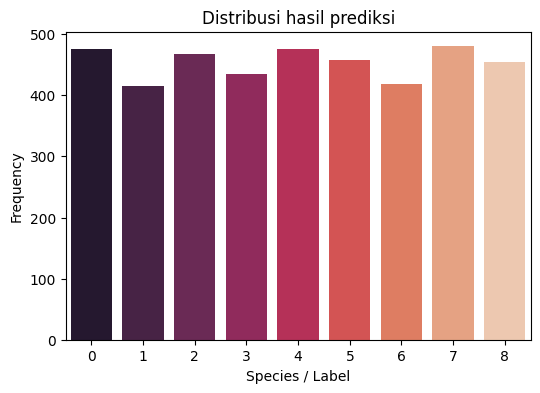

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_fish, x='species', palette='rocket')
plt.title('Distribusi hasil prediksi')
plt.xlabel('Species / Label')
plt.ylabel('Frequency')
plt.show()

In [10]:
df_fish.corr()

,species,length,weight,w_l_ratio
species,1.000000,0.342145,0.475682,-0.181628
length,0.342145,1.000000,0.411584,-0.738174
weight,0.475682,0.411584,1.000000,0.245835
w_l_ratio,-0.181628,-0.738174,0.245835,1.000000


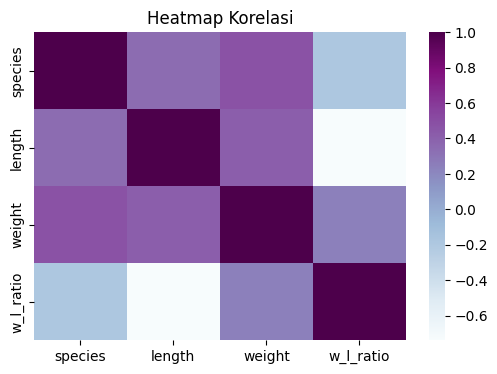

In [11]:
plt.figure(figsize=(6, 4))
sns.heatmap(df_fish.corr(), cmap='BuPu')
plt.title('Heatmap Korelasi')
plt.show()

In [12]:
x = df_fish.drop(columns=['species'])
y = df_fish['species']

print("x shape: ", x.shape)
print("y shape: ", y.shape)

x shape:  (4080, 3)
y shape:  (4080,)


In [13]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.63, random_state=0)


# Modelling & Evaluation

In [15]:
model_svm = SVC(kernel='linear')
model_svm.fit(x_train, y_train)

y_pred = model_svm.predict(x_test)
CLF_acc = accuracy_score(y_pred, y_test)

print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(CLF_acc*100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       1.00      1.00      1.00       266
           2       0.76      0.42      0.54       312
           3       1.00      1.00      1.00       267
           4       1.00      1.00      1.00       288
           5       1.00      1.00      1.00       290
           6       1.00      1.00      1.00       260
           7       0.57      0.86      0.69       283
           8       1.00      1.00      1.00       304

    accuracy                           0.91      2571
   macro avg       0.93      0.92      0.91      2571
weighted avg       0.92      0.91      0.91      2571

Akurasi SVM : 91.33%


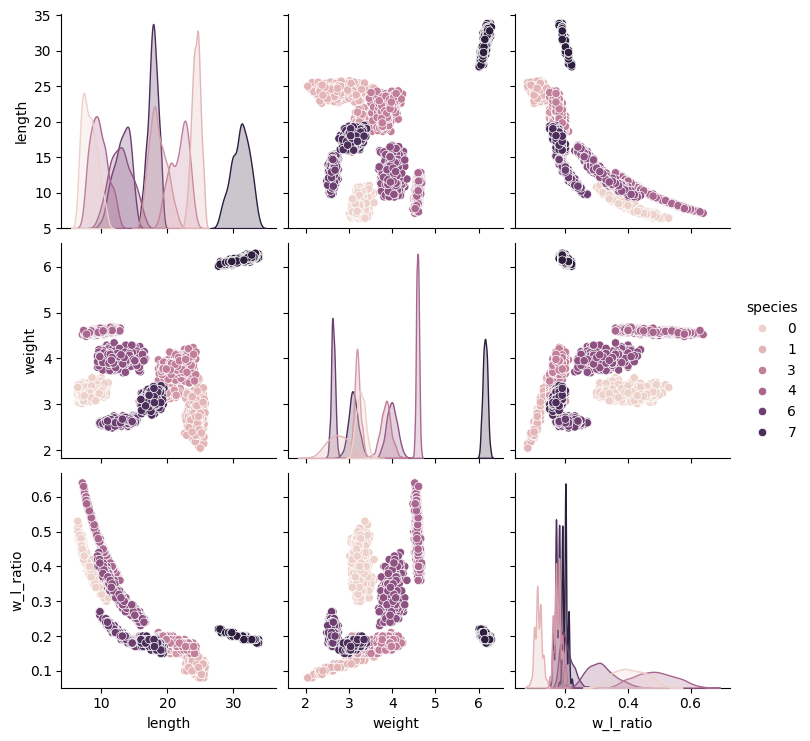

In [16]:
sns.pairplot(df_fish,vars=['length', 'weight', 'w_l_ratio'], hue='species')

In [17]:
new_data = {'length': [10.54], 'weight': [3.29], 'w_l_ratio': [0.25]}
new_data = pd.DataFrame(new_data)
new_data

,length,weight,w_l_ratio
0,10.54,3.29,0.25


In [18]:
scaled_new_data = scaler.transform(new_data)
y_pred_new = model_svm.predict(scaled_new_data)

print("Prediksi data baru: ", y_pred_new)

Prediksi data baru:  [0]


In [19]:
filename = 'model_svm_fish.sav'
pickle.dump(model_svm, open(filename, 'wb'))
print("Model berhasil disimpan ke file:", filename)

Model berhasil disimpan ke file: model_svm_fish.sav
